# 训练word2vec

In [2]:
from string import punctuation
from os import listdir
from gensim.models import Word2Vec

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def doc_to_clean_lines(doc, vocab):
    clean_lines = list()
    lines = doc.splitlines()
    for line in lines:
        # split into tokens by white space
        tokens = line.split()
        # remove punctuation from each token
        table = str.maketrans('', '', punctuation)
        tokens = [w.translate(table) for w in tokens]
        # filter out tokens not in vocab
        tokens = [w for w in tokens if w in vocab]
        clean_lines.append(tokens)
    return clean_lines

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        doc = load_doc(path)
        doc_lines = doc_to_clean_lines(doc, vocab)
        # add lines to list
        lines += doc_lines
    return lines

# load the vocabulary
vocab_filename = 'output/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load training data
positive_lines = process_docs('input/txt_sentoken/pos', vocab, True)
negative_lines = process_docs('input/txt_sentoken/neg', vocab, True)
sentences = positive_lines + negative_lines
print('Total training sentences: %d' % len(sentences))

# train word2vec model
model = Word2Vec(sentences, size=100, window=5, workers=8, min_count=1)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

# save model in ASCII (word2vec) format
filename = 'output/embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

Total training sentences: 58109
Vocabulary size: 25767


In [8]:
import numpy as np

def load_word_vec(filename):
    with open(filename, "r") as infile:
        lines = infile.readlines()
    word_list = []
    data_stack = []
    for line in lines[1:]:
        items = line[:-1].split()
        word_list.append(items[0])
        data_stack.append([float(x) for x in items[1:]])
    return word_list, np.array(data_stack)

word_list, matrix = load_word_vec("output/embedding_word2vec.txt")
print(matrix.shape)

(25767, 100)


# TSNE可视化

* 选择其中的一部分

In [3]:
from sklearn.manifold import TSNE

ts = TSNE(2)
reduced_vecs = ts.fit_transform(matrix[:1000])
print(reduced_vecs.shape)

(1000, 2)


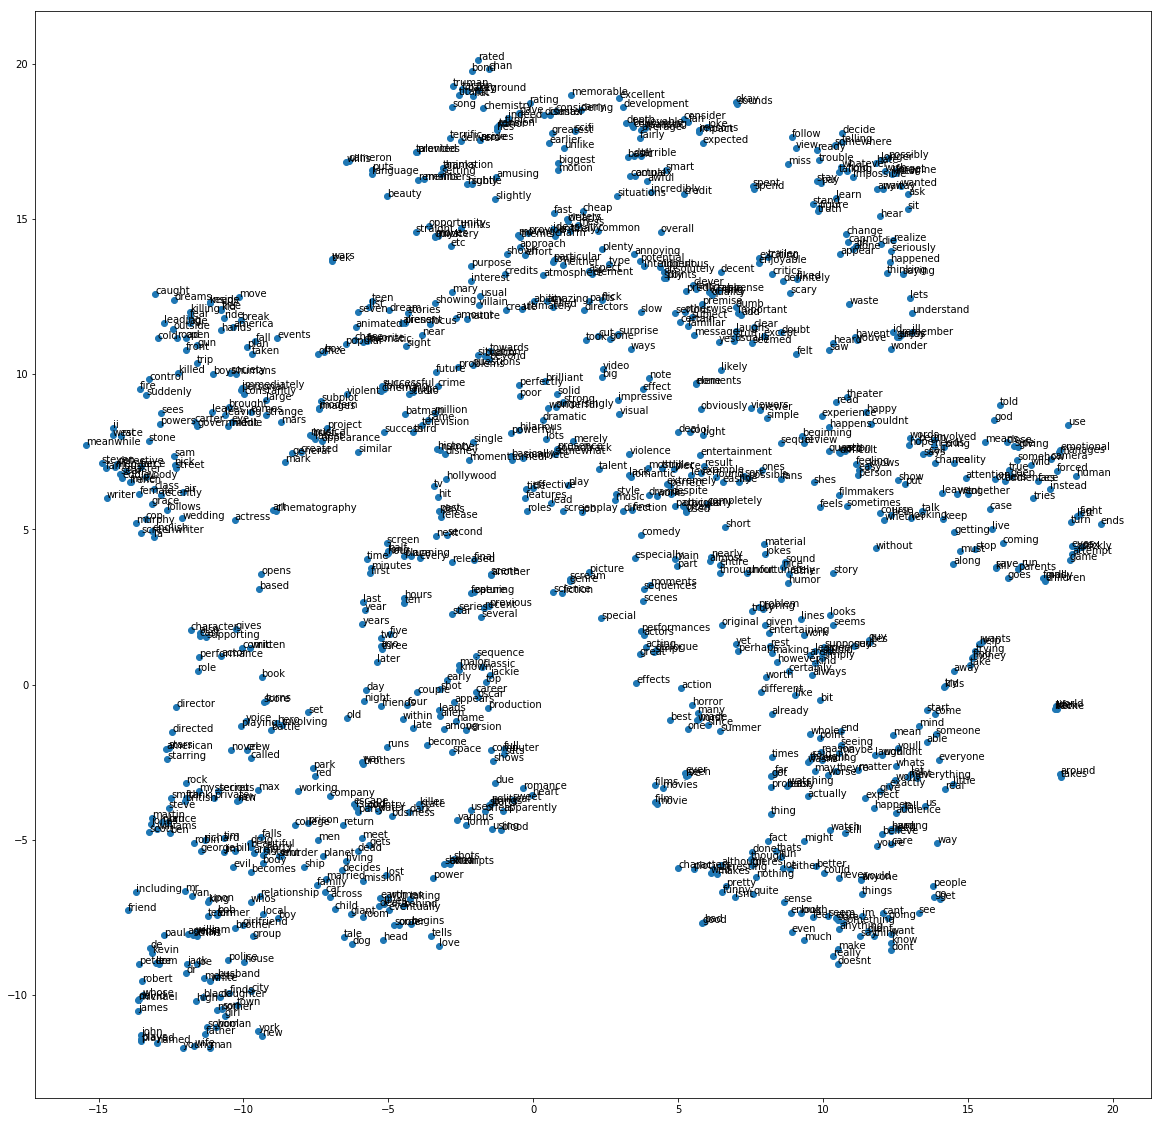

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(reduced_vecs[:,0], reduced_vecs[:, 1])
for (x, y), word in zip(reduced_vecs, word_list):
    plt.text(x, y, word)
plt.show()